# Python library: Scikit-Learn


All machine learning models in scikit-learn are implemented as python classes.     
These classes serves 2 purposes:     
1) they implement the algorithms for learning and predicting     
2) store all the information that is learned from the data     

**Training** a model on the data is also called fitting the model to the data:     
In scikit-learn, we use the .fit() method.      

To **predict** the label of an unlabeled data point:     
In scikit-learn, we use the .predict() method.      


## 0. Machine learning

Giving computers the ability to learn to make decisions from data *without being explicitly programmed*.     


### 0.1 Supervised learning VS Unsupervised learning VS reinforcement learning

**Supervised learning** uses labeled data, an example will be learning if an email is spam or not. The label of each data is *spam* or *not spam*.    

**Unsupervised learning** uncovers hidden patterns and structures from unlabeled data.    
e.g. a bussiness may wish to group its customers into distinct categories base on their purchasing behavior, *without* knowing in advance what these categories maybe. (Clustering)    

In **reinforcement learning** the machine or software agent interact with an environment. The reinforcement agent are able to automatically figure out how to optimise their behavior, *given a system of reward or punishment*. It draws inspiration from behavioral psychology.    


### 0.2 Naming conventions

features == predictor variables == independent variables    

target variable == dependent variable == response variable    



## 1. Supervised learning

There are several data points (or samples) described using predictor variable (or features) and a target variable.    
Data usually presented in a table, row for each data points and column for each feature.     
The aim of supervised learning is to build a model that is able to predict the target variable, given the predictor variables.    
e.g. given the Iris flower data set, the taget variable can be the species (setosa etc.), given the sepal length/petal length/width (predictor variables).     

If the target variable consist of categories, like "click" or "no click", "spam" or "not spam", or different species of flowers, we call the learning task **Classification**.     

If the target is a continuously varying variable, for example, the price of a house, then it is a **Regression** task.     
Purpose of supervised learning:     
1) automate time-consuming or expensive maual tasks (e.g. doctor's diagnosis)       
2) make predictions about future (e.g. if a customer will click on an add)     

**Need** labeled data, you can get it from:          
1) historical data which already has labels that you are interested in.       
2) perform experiments to get labeled data. (e.g. A/B testing to see how many clicks you get)      
3) crowdsourced labeling data.       

The goal of supervised learning is to learn from data for which the right output is known, so that we can make predication o new data for which we don't know the output.     




In [60]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

**Note on the Iris dataset**     
It describe the Iris flower which the **features** consist of 4 measurements:    
1) petal length     
2) petal width     
3) sepal length      
4) sepal width      
and the **target** variable encodes the species of flower and thereare 3 possibilities:     
1) versicolor     
2) virgincia     
3) setosa      


In [4]:
iris = datasets.load_iris()

In [5]:
type(iris) #Bunch object, similar to a dictionary, contains k-v pairs

sklearn.utils.Bunch

In [6]:
print(iris.keys())
# DESCR: provide a description of the data set
# data: contains the values of features
# target: target data

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
# both feature and target data are provided as NumPy arrays
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
# 150 rows and 4 cols in features data
iris.data.shape
#150 samples with 4 features (petal/sepal length/width)

(150, 4)

target variable is encoded as:     
setosa == 0      
versicolor == 1       
virginica == 2

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 2. Exploratory data analysis (EDA)

In [10]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


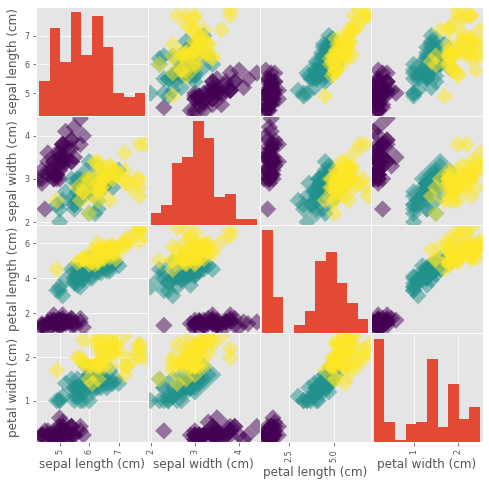

In [15]:
_ = pd.plotting.scatter_matrix(df,c = y , figsize = [8,8], s=150, marker = "D")
# target variable to c (color), ensure our data points in fig will be colored by their species
# s: marker size, marker : shape

The results is a matrix of figures.      
Diagonal are histogram of the features corresponding to the row and column.     
Off-diagonal figures are scatter plots of the column features versus row features colored by target variable

## 3. Classification (supervised)

**The challenge**:     
We would like to build a classifier that takes unlabeled data as input and outputs a label.     
We first need to choose a type of classifier and it needs to learn from the already labeled data (training data).      


### 3.1 k-Nearest Neighbors (KNN)

Basic idea:     
To predict the label of any data point by looking at the k (e.g. 3) closest labeled data points and getting them to (majority) vote on what label the unlabeled point should have.     

Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.    

Larger k = smooth decision boundary and less curvy = less complex model = can lead to underfitting
Smaller k = more complex model = can lead to overfitting     

**Small** k can lead to sensitive to noise in the specific data we have, rather than relecting general trends in the data.         

**Large** k can make model even simpler, then model will perform less well on both test and training set.(i.e. the testing and training accuracy will drop, the graph that shows testing and training accuracy vs k is called model complexity curve). This is called underfitting.     





In [21]:
from sklearn.neighbors import KNeighborsClassifier
#instantiate the classifier, set no. of neightbor to 6
knn = KNeighborsClassifier(n_neighbors=6)
#fit this classifier to our training set, the labeled data
# sklearn API requires data as np array or pd df, features takes on continuous value (as oppose to categorical data)
# requires no missing values in the data
# sklearn requires each col is a feature, each row a diff observation or data point
# target needs to be a single col with the same number of observation as the feature data
knn.fit(iris["data"],iris["target"]) #X,y
# The above returns the classifier itself and modifies it (knn object) to fit it to the data. 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
# predict unlabeled data
# set of observation X_new
# API requires data as np array with feature in col and observations in rows

In [34]:
X_new = np.array([[4.7,3.1,1.2,0.2],[5.0,3.6,1.4,0.2],[5.6,4.1,1.8,0.4]]) #new observation to be labeled
print(X_new.shape)
prediction = knn.predict(X_new)
print("Prediction {}".format(prediction)) # all setosa prediction

(3, 4)
Prediction [0 0 0]


## 3.2 Measuring model performance

In classification problems, accuracy is a commonly-used metric.     
Accuracy = Fraction of correct predictions. (i,e, no. of correct prediction / total no. of data points)      

It is common to split data into 2 sets:     
1) training set (fit or train)     
2) test set (predict on the labeled test set)      
then compare these predictions with the known labels.      



In [37]:
from sklearn.model_selection import train_test_split
# use the train_test_split function to randomly split our data
# 1st arg: feature data
# 2nd arg: targets or label
# test_size: what proportion of the original data is used for the test set
# random_state: sets a seed for the RNG that splits the data into train and test
# this func returns 4 array
# by default, the split is 75% training data, 25% test data
# stratify: labels to be distributed in train and test tests as they are in the original data set. To keep track
X = iris["data"] # already a np array, if its df then use .values to convert to array. df will also works
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21,stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [38]:
# check accuracy, use .score() method
knn.score(X_test, y_test)

0.9555555555555556

## Example: the digits recognition dataset

In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9. A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.    

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise.     

On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

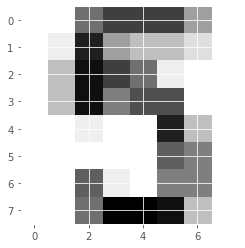

In [39]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010 (1010th image)
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [44]:
print(digits.target.shape)

(1797,)


In [45]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

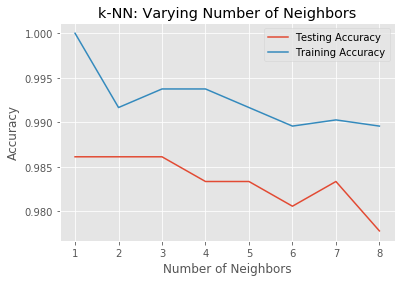

In [46]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## 4. Regression (supervised)

The target value is continuous varying variable, such as a country's GDP or price of a house.    

Regression mechanics:    
y = ax + b      
y = target     
x = single feature      
a,b = parameters of model we want to learn      

How do we choose a and b?    
A common method is to define an error function for any given line and then to choose the line that minimizes the error function.     
For linear regression, this lost function is Ordinary least squares (OLS): minimize sum of squares of residuals.     

When you call .fit() on a linear regression model in scikit-learn, it performs this OLS under the hood.    

When we have 2 features and 1 target, a line is of the form:      
$y = a_1x_1 + a_2x_2 + b$
which need to spcified 3 variables to fit a linear regression model.($a_1a_2b$)      

For higher dimension:     
$y=a_1x_1 + a_2x_2 + a_3x_3 + ... + a_n x_x +b$      
must specify coefficient for each feature and the variable b.      

Scikit-learn API works exactly the same way: passing two arrays: feature, and target.     

In general, you will never use linear regression out of the box, you will most likely wish to use regularisation that place further constraints on the model coefficients.    




In [81]:
# boston housing data
boston = pd.read_csv("../Machine_Learning_basics/data/boston.csv")
print(boston.head())
# CRIM: per capita crime rate
# NX: nitri oxide concentration
# RM: avg no. of rooms per dwelling
# target: MEDV: median value of owner occupied homes in thousand of dollors

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [82]:
# creating df for X and y
# drop target, get df for features
X = boston.drop("MEDV", axis=1).values #convert to np array with .values
# keep only the target
y = boston["MEDV"].values

In [76]:
# predict price from a single feature: the avg no. of rooms in a block
# slice out no. of rooms col
X_rooms = X[:,5] #np array

# turn them into arrays of desired shape, use reshape
y = y.reshape(-1,1) #-1 basically means unknown, this line only tell np to have 1 col, np has to figure out how many row to be compatible witht he original array
X_rooms = X_rooms.reshape(-1,1)

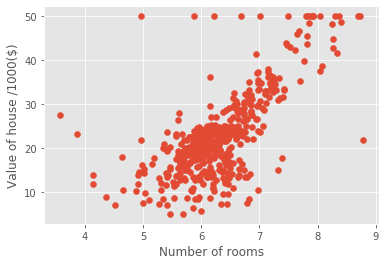

In [77]:
# plot house value as a func of no. of rooms
plt.scatter(X_rooms, y)
plt.ylabel("Value of house /1000($)")
plt.xlabel("Number of rooms")
plt.show()

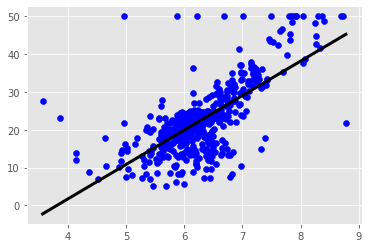

In [78]:
# linear regression model
from sklearn import linear_model
#instantiate LinearRegression as reg
reg = linear_model.LinearRegression()

#fit the regressor to the data
reg.fit(X_rooms, y)

#check out the regressors prediction over the range of data
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)
#data set
plt.scatter(X_rooms, y, color="blue")
#predict over the range of the training dataset
plt.plot(prediction_space, reg.predict(prediction_space),color="black", linewidth=3)

plt.show()

### 4.1 Measuring model performace

The default scoring method for linear regression is called R squared.    
This metric quantifies the amount of variance in the target variable that is predicted from the feature variables.     


In [79]:
# linear regression on all features (high dimension fit)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
#instantiate the regressor
reg_all = linear_model.LinearRegression()

reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

#R squared
reg_all.score(X_test, y_test)

0.7112260057484953

In addition to computing the R square score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. 

In [80]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4.6386899261728045


## 4.2 Cross-validation

The R squared returned is dependent on the way that you split up the data.     
Not representative of the model's ability to generalise.     
We can use cross-validation!      

1) split the dataset into 5 groups or folds      
2) we hold out the first fold as a test set, fit our model on the remaining four folds, predict on the test set and compute the metric of interest     
3) hold out 2nd fold as test data, fit the model with the remaining data, compute the metric of interest       
4) As a result, we will have 5 values of R squared from which we can compute metric of interest (mean, median, 95% confidence intervals)        
5) This is called 5 fold Cross-Validation     

Or k-fold CV in short for split into k folds.      


In [83]:
from sklearn.model_selection import cross_val_score
#instaniate regressor
reg = linear_model.LinearRegression()

#this returns an array of CV scores, length of array is no. fold used
# value reported is R squared, default
cv_results = cross_val_score(reg,X,y, cv=5)

print(cv_results)
print(np.mean(cv_results))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.3532759243958813


## 4.3 Regularised regression

Linear regression try to minimise the loss function to choose a coefficient $a_i$ for each feature variable.     
Large coefficient can lead to overfitting.      
Therefore it is common practice to alter the loss function so that it penalises for large coefficients, i.e. **regularisation**.     

**Ridge Regression**: (usually first choice)      
Loss function is the standard OLS function plus the squred value of each coefficient multiplied by some constant alpha:    
$\text{Loss function} = \text{OLS loss function} + \alpha \sum^{n}_{i=1} a^{2}_{i}$    

Thus when minimising the loss function to fit the our data, models are penalised for coefficient with a large magnitude (both positively or negatively large).    
we need to choose $\alpha$ in order to fit and predict.     
Picking $\alpha$ is similar to picking k in knn, which is called hyperparameter tuning.    
$\alpha=0$: get back OLS (can lead to overfitting)     
Very large $\alpha$: lead to simple model and lead to underfitting.     

**Lasso Regression**:    
Loss function isthe standard OLS plus the absolute value of each coefficient multiplied by some constant $\alpha$:    

$\text{Loss function} = \text{OLS loss function} + \alpha \sum^{n}_{i=1} |a_{i}|$   

Lasso regression can be used to select import feature of a dataset.     
This is because it tends to shrink the coefficients of less important features to be exactly 0.     
The features whose coefficients are not shrunk to 0 are "selected" by the Lasso algorithm.     


In [87]:
# Ridge regression
from sklearn.linear_model import Ridge

X_trian, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#instantiate
ridge = Ridge(alpha=0.1, normalize=True) # norm: all our variables on the same scale
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127315

In [89]:
# Lasso regression
from sklearn.linear_model import Lasso

X_trian, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#instantiate
lasso = Lasso(alpha=0.1, normalize=True) # norm: all our variables on the same scale
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5950229535328551

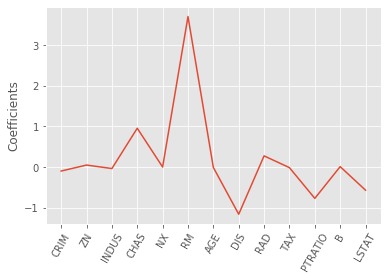

In [91]:
# Lasso regression: feature selection
from sklearn.linear_model import Lasso

# store feature names in the variable names
names = boston.drop("MEDV",axis=1).columns

#instantiate regressor
lasso = Lasso(alpha=0.1)

#fit and then extract the coef attribute and store it
lasso_coef = lasso.fit(X,y).coef_

#plotting the coefficient as a function of features yields this fig
_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names, rotation = 60)
_ =plt.ylabel("Coefficients")
plt.show()

## Example: Gapminder

In [67]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv("../Machine_Learning_basics/data/gm_2008_region.csv")

# Create arrays for features and target variable
y = df["life"].values
X_fertility = df["fertility"].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X_fertility = X_fertility.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139, 1)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


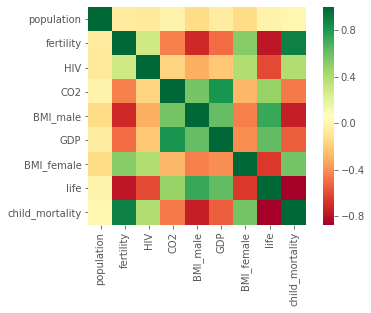

In [68]:
# correlation between features
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

0.6192442167740035


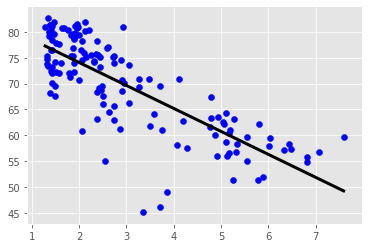

In [72]:
# Create the regressor: reg
reg = linear_model.LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(X_fertility,y, color="blue")
plt.show()
